In [1]:
# Import libraries
%reload_ext autoreload
%autoreload 2

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from IPython.display import display, HTML, Latex, Image, Video
from IPython.display import Markdown as md
from IPython.core.magic import register_cell_magic
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import mercury as mr

# Allow for markdown code cells
@register_cell_magic
def markdown(line, cell):
    return md(cell.format(**globals()))

# Set the Mercurty metadata forthe report
app = mr.App(title="Lab 5 - Friction I (Horizontal Plane)", description="Lab report for PHYS 2125 (15921) Spring 2025 Lab 5.")

# Lab Information
name = mr.Text(value="Your Name", label="What is your name?", rows=1)
course = mr.Text(value="PHYS 2125 (15921)", label="What class are you in?", rows=1)
date = mr.Text(value="2025-02-14", label="Lab Date", rows=1)
labNum = mr.Text(value="5", label="Lab Number", rows=1)
labName = mr.Text(value="Friction I (Horizontal Plane)", label="Lab Name", rows=1)
labObjective= mr.Text(value="Determine the coefficient of friction between the wooden block and the track.", label="Objective", rows=3)
file = mr.File(label="Data file upload", max_file_size="10MB")
# skip1 = mr.Checkbox(value=False, label="Were you instructed to exclude your first trial from the calculations?")
# It would be cooler if we could get the discussion questions into a dict and loop through them.
q1 = mr.Text(value="Question 1 Answer", label="Why do you try to maintain the constant speed motion of the block? (5 pts)", rows=5)
q2 = mr.Text(value="Question 2 Answer", label="What is the most important part of the experiment? (5 pts)", rows=5)
# q3 = mr.Text(value="Question 3 Answer", label="Question 3?", rows=5)
discussion = mr.Text(value="Discussion", label="Discuss", rows=5)
plt1_xaxis = mr.Text(value = '$M_b\; (g)$', label="X-axis label", rows=1)
plt1_yaxis = mr.Text(value = '$M_H\; (g)$', label="Y-axis label", rows=1)
plt1_title = mr.Text(value = '$\mu_k$ as mass of block $M_b$ vs mass of hanging weight $M_H$', label="Graph title", rows=1)
dataColumnNames = ["$M_b$ (g)", "$M_a$ (g)", "$M_h$ (g)", "$M_H$ (g)", "$\mu_k$"];

mercury.App

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.File

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

In [2]:
%autoreload 2

# Parse Data
if file.filepath is not None:
    df = pd.read_csv(file.filepath, names=dataColumnNames, header=0).set_index(dataColumnNames[0])
else:
    df = pd.read_csv('lab5.csv', names=dataColumnNames, header=0).set_index(dataColumnNames[0])

# In theory the data we uploaded already has lots of these values, but just in case the Excel wasn't perfect we're going to do it here.

# Constants
g_earth = 9.8;

# Calculate M_H as M_h + M_a, but only where we have a number for M_a
df[dataColumnNames[3]] = df.apply(lambda row: row[dataColumnNames[2]] + row[dataColumnNames[1]], axis=1)

# Calculate μ_k
df[dataColumnNames[4]] = df.apply(lambda row: row[dataColumnNames[3]] / row.name, axis=1)

# Calculate the trend line slope and intercept
trend = np.polyfit(df.index, df[dataColumnNames[3]], 1)  # 1 for linear trendline
trend_slope, trend_intercept = trend
u_k_g = trend_slope

# Mean and StdDev across the board
mean = df.mean()
deviation = df.std(ddof=0)
u_k_t = mean[dataColumnNames[4]];
u_k_t_dev = deviation[dataColumnNames[4]];

# Calculate % difference between u_k_table and u_k_graph
u_k_diff = abs( u_k_g - u_k_t ) / ( ( u_k_t + u_k_g ) / 2 )

# Save this for the graph
df_graph = df.fillna('');

# Add the average value of u_k
df.loc['Average'] = {
    dataColumnNames[1]: np.nan,
    dataColumnNames[2]: np.nan,
    dataColumnNames[3]: np.nan,
    dataColumnNames[4]: u_k_t
};
# Add the standard devation value of u_k
df.loc['StdDev'] = {
    dataColumnNames[1]: np.nan,
    dataColumnNames[2]: np.nan,
    dataColumnNames[3]: np.nan,
    dataColumnNames[4]: u_k_t_dev
};

# Save this for the table
df_table = df.fillna('');

# Let's make some stings
u_k_t_str = str("%.3f" % round(u_k_t, 3))
u_k_t_dev_str = str("%.3f" % round(u_k_t_dev, 3))
u_k_diff_str = str("%.3f" % round(u_k_diff, 3))
u_k_g_str = str("%.3f" % round(u_k_g, 3))
trend_slope_str = str("%.3f" % round(trend_slope, 3))
trend_intercept_str = str("%.3f" % round(trend_intercept, 3))

In [3]:
%%markdown

# Lab {labNum.value}: {labName.value}
Name: **{name.value}** \
Class: **{course.value}** \
Date: **{date.value}**

<p style="page-break-after:always;"></p>

## Objective

{labObjective.value}


# Lab 5: Friction I (Horizontal Plane)
Name: **Your Name** \
Class: **PHYS 2125 (15921)** \
Date: **2025-02-14**

<p style="page-break-after:always;"></p>

## Objective

Determine the coefficient of friction between the wooden block and the track.


## Equipment

- (1) 50cm "PASTrack" track with four legs
- (1) 110g friction block
- (1) set of masses
- (1) 5g hook
- (1) ~70cm length of string
- (1) pulley

<p style="page-break-after:always;"></p>

## Theory

$F_{net} = M_a for M_H:\; ↓ M_H \cdot g - T = M_H \cdot a$

$F_{net} = M_a for M_b:\; → T-f_k = M_b \cdot a$

$f_K = μ \cdot n$

$n = M_b \cdot g$

$M_Hg - μ_k \cdot M_bg = M_Ha + M_ba$

Setting $a = 0$

$M_Hg - μ_k \cdot M_bg = 0$

$μ_k \cdot M_b = M_H$

where

$M_b$ is the mass of the block

$M_h$ is the mass of the hook ($5g$)

$M_a$ is the hanging mass added with each  trial

$M_H$ is the total mass of hanging block including the hook and added weight ($M_H = M_h + M_a$)

$f_k$ is the friction force

$n$ is the normal force

$g_{earth}$ is the gravitatational constant ($9.8 \frac{m}{s^2}$ on Earth)

$T$ is the tension

In [4]:
display(Image(url='https://raw.githubusercontent.com/dundonite/Physics-Lab-2125-15921/refs/heads/main/lab5.png', width=500))

<p style="page-break-after:always;"></p>

## Procedure

### Initial Setup

A track and pulley system were constructed.

1. A $50cm$ piece of PASTrack was placed on a table, ensuring the PASTrack end is near the table end to allow for the weight to hang over.
1. A pully was connected to the track, on the end near the end of the table.
1. A friction block was tied to a 5g hook using a length of string.
1. The friction block was placed on the track, furthest from the edge near the pulley.
1. The string was laid over the pulley and the hook was left hanging.

### Trial (completed for each $M_b$)

1. As needed the weight of the block $M_b$ was increased by placing a weight in the center.
1. The block was moved to the end of the track opposite the pulley.
1. Weight was slowly added to the hook $M_a$ until the following occurred:
   1. The block was lightly tapped in the direction of the pulley to overcome the static friction.
   1. The block steadily advanced down the track until reaching the pulley.

<video width="500px" muted loop autoplay src="./lab5.mp4" />

<p style="page-break-after:always;"></p>

## Data

In [5]:

%autoreload 2
# Print the data table
mr.Table(data=df_table, width="25px")
#HTML(df_table.to_html(notebook=True,col_space=10))

In [6]:
#if skip1.value:
#    display(md("_Note: the first trial was excluded from the calculations as a likely error._"))

<p style="page-break-after:always;"></p>

## Calculations

In [7]:
# Show the math? (LaTeX)

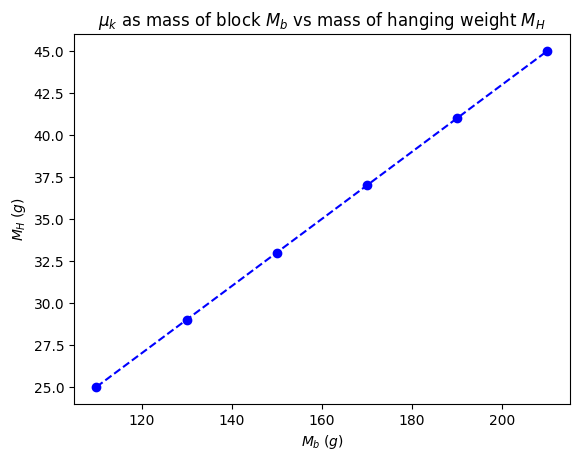

In [8]:
# We should figure out a way to deifne the chart details in the calculations section such that this section can remain static.

# Plot the measurements
plt.scatter(df_graph.index, df_graph[dataColumnNames[3]], color="blue", marker="o");

# Plot the trendline
p = np.poly1d(trend)

fit = np.polyval(trend, df_graph[dataColumnNames[3]])
plt.plot(df_graph.index, p(df_graph.index), color="blue", linestyle="--")

# Add labels w LaTeX support
plt.xlabel(plt1_xaxis.value);
plt.ylabel(plt1_yaxis.value);
plt.title(plt1_title.value);
plt.rcParams['text.usetex'] = True;
plt.rcParams['font.family'] = 'serif';

# Show the graph
plt.show();

In [9]:
%%markdown

Using the least squares method a trend line is fit to the data with *slope* {trend_slope_str} and *$y$-intercept* {trend_intercept_str}, resulting in the equation $ y = {trend_slope_str} x + {trend_intercept_str} $.


Using the least squares method a trend line is fit to the data with *slope* 0.200 and *$y$-intercept* 3.000, resulting in the equation $ y = 0.200 x + 3.000 $.


In [10]:
%%markdown

<p style="page-break-after:always;"></p>

## Results

The value of $μ$ was determined using the mean, $μ_t$, and the least squares fit, $μ_g$. 

$μ_t = {u_k_t_str} $ with $σ$ of ${u_k_t_dev_str}$

$μ_g = {u_k_g_str} $

This equates to a ${u_k_diff_str}$% difference.

## Discussion

{discussion.value}

## Questions

__Why do you try to maintain the constant speed motion of the block?__

{q1.value}

__What is the most important part of the experiment?__

{q2.value}


<p style="page-break-after:always;"></p>

## Results

The value of $μ$ was determined using the mean, $μ_t$, and the least squares fit, $μ_g$. 

$μ_t = 0.220 $ with $σ$ of $0.004$

$μ_g = 0.200 $

This equates to a $0.094$% difference.

## Discussion

Discussion

## Questions

__Why do you try to maintain the constant speed motion of the block?__

Question 1 Answer

__What is the most important part of the experiment?__

Question 2 Answer
